In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve,auc
import pickle
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb


In [3]:
#reading csv file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hospital_readmissions.csv")

In [4]:
#shape and size
df.shape

(25000, 17)

In [5]:
#sample data
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [6]:
#getting dynamics of the data
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [7]:
#getting data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [8]:
#checking for null values
df.isna().sum()

,0
age,0
time_in_hospital,0
n_lab_procedures,0
n_procedures,0
n_medications,0
n_outpatient,0
n_inpatient,0
n_emergency,0
medical_specialty,0
diag_1,0


In [9]:
#checking for duplicates rows
df.duplicated().sum()

0

In [10]:
# values counts for target column
df['readmitted'].value_counts()

,count
readmitted,
no,13246
yes,11754


In [11]:
#converting target category column into numerical
target_category_mapping = {'no': 0, 'yes': 1}
df['readmitted'] = df['readmitted'].map(target_category_mapping)

In [12]:
# function for getting numerical and categorical columns
def get_columns_by_type(df):
    # Get numerical columns with int64 type
    int64_columns = df.select_dtypes(include=['int64']).columns.tolist()

    # Get categorical columns with object type
    object_columns = df.select_dtypes(include=['object']).columns.tolist()

    return int64_columns, object_columns
numerical_cols,categorical_cols=get_columns_by_type(df)

###CORRELATION

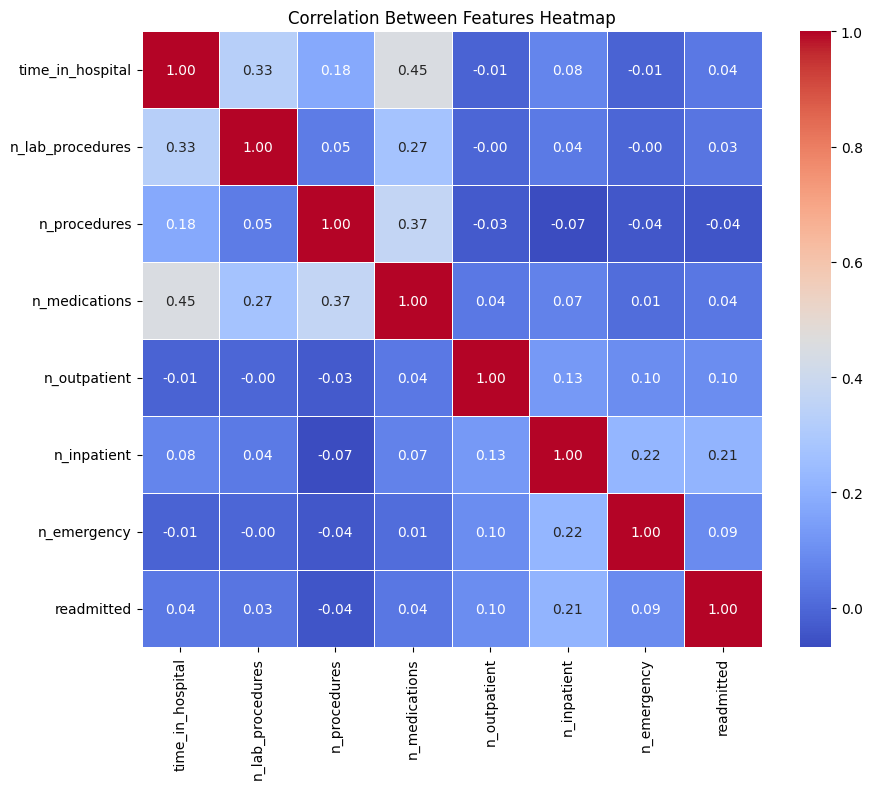

In [13]:
#checking for correlation between features
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Features Heatmap")
plt.show()

In [14]:
#correlation with features and target
corr_mat_target=df[numerical_cols].corr()['readmitted'].to_frame()

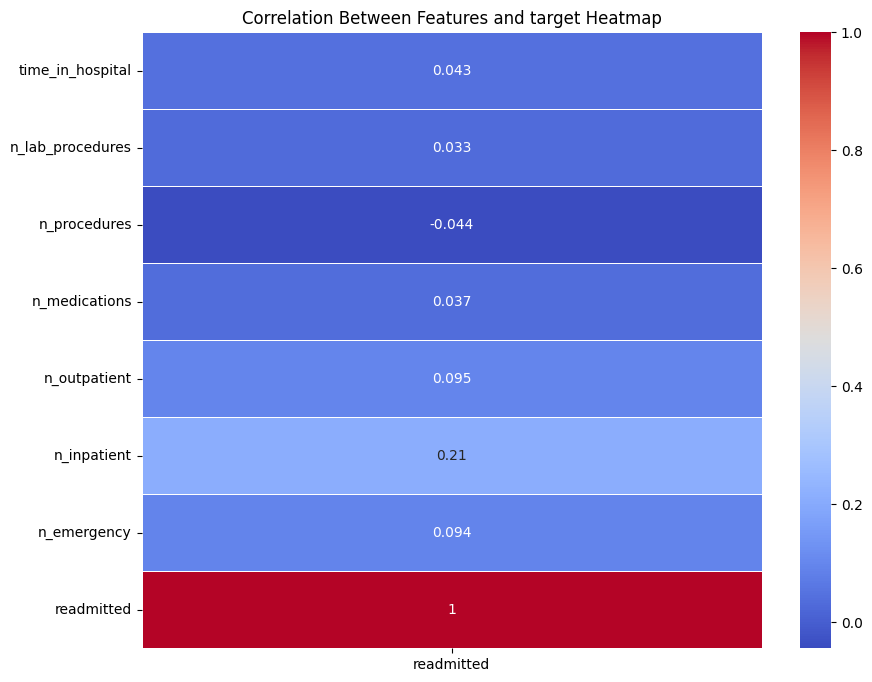

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat_target,annot=True,cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Features and target Heatmap")
plt.show()

#Exploratory Data Analysis

<ipython-input-16-0af9635c0d9a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'n_procedures', palette = 'Set1', data = df)
<ipython-input-16-0af9635c0d9a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'medical_specialty', palette = 'Set1', data = df)
<ipython-input-16-0af9635c0d9a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'diag_1', palette = 'Set1', data = df)
<ipython-input-16-0af9635c0d9a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

<Axes: xlabel='diag_3', ylabel='count'>

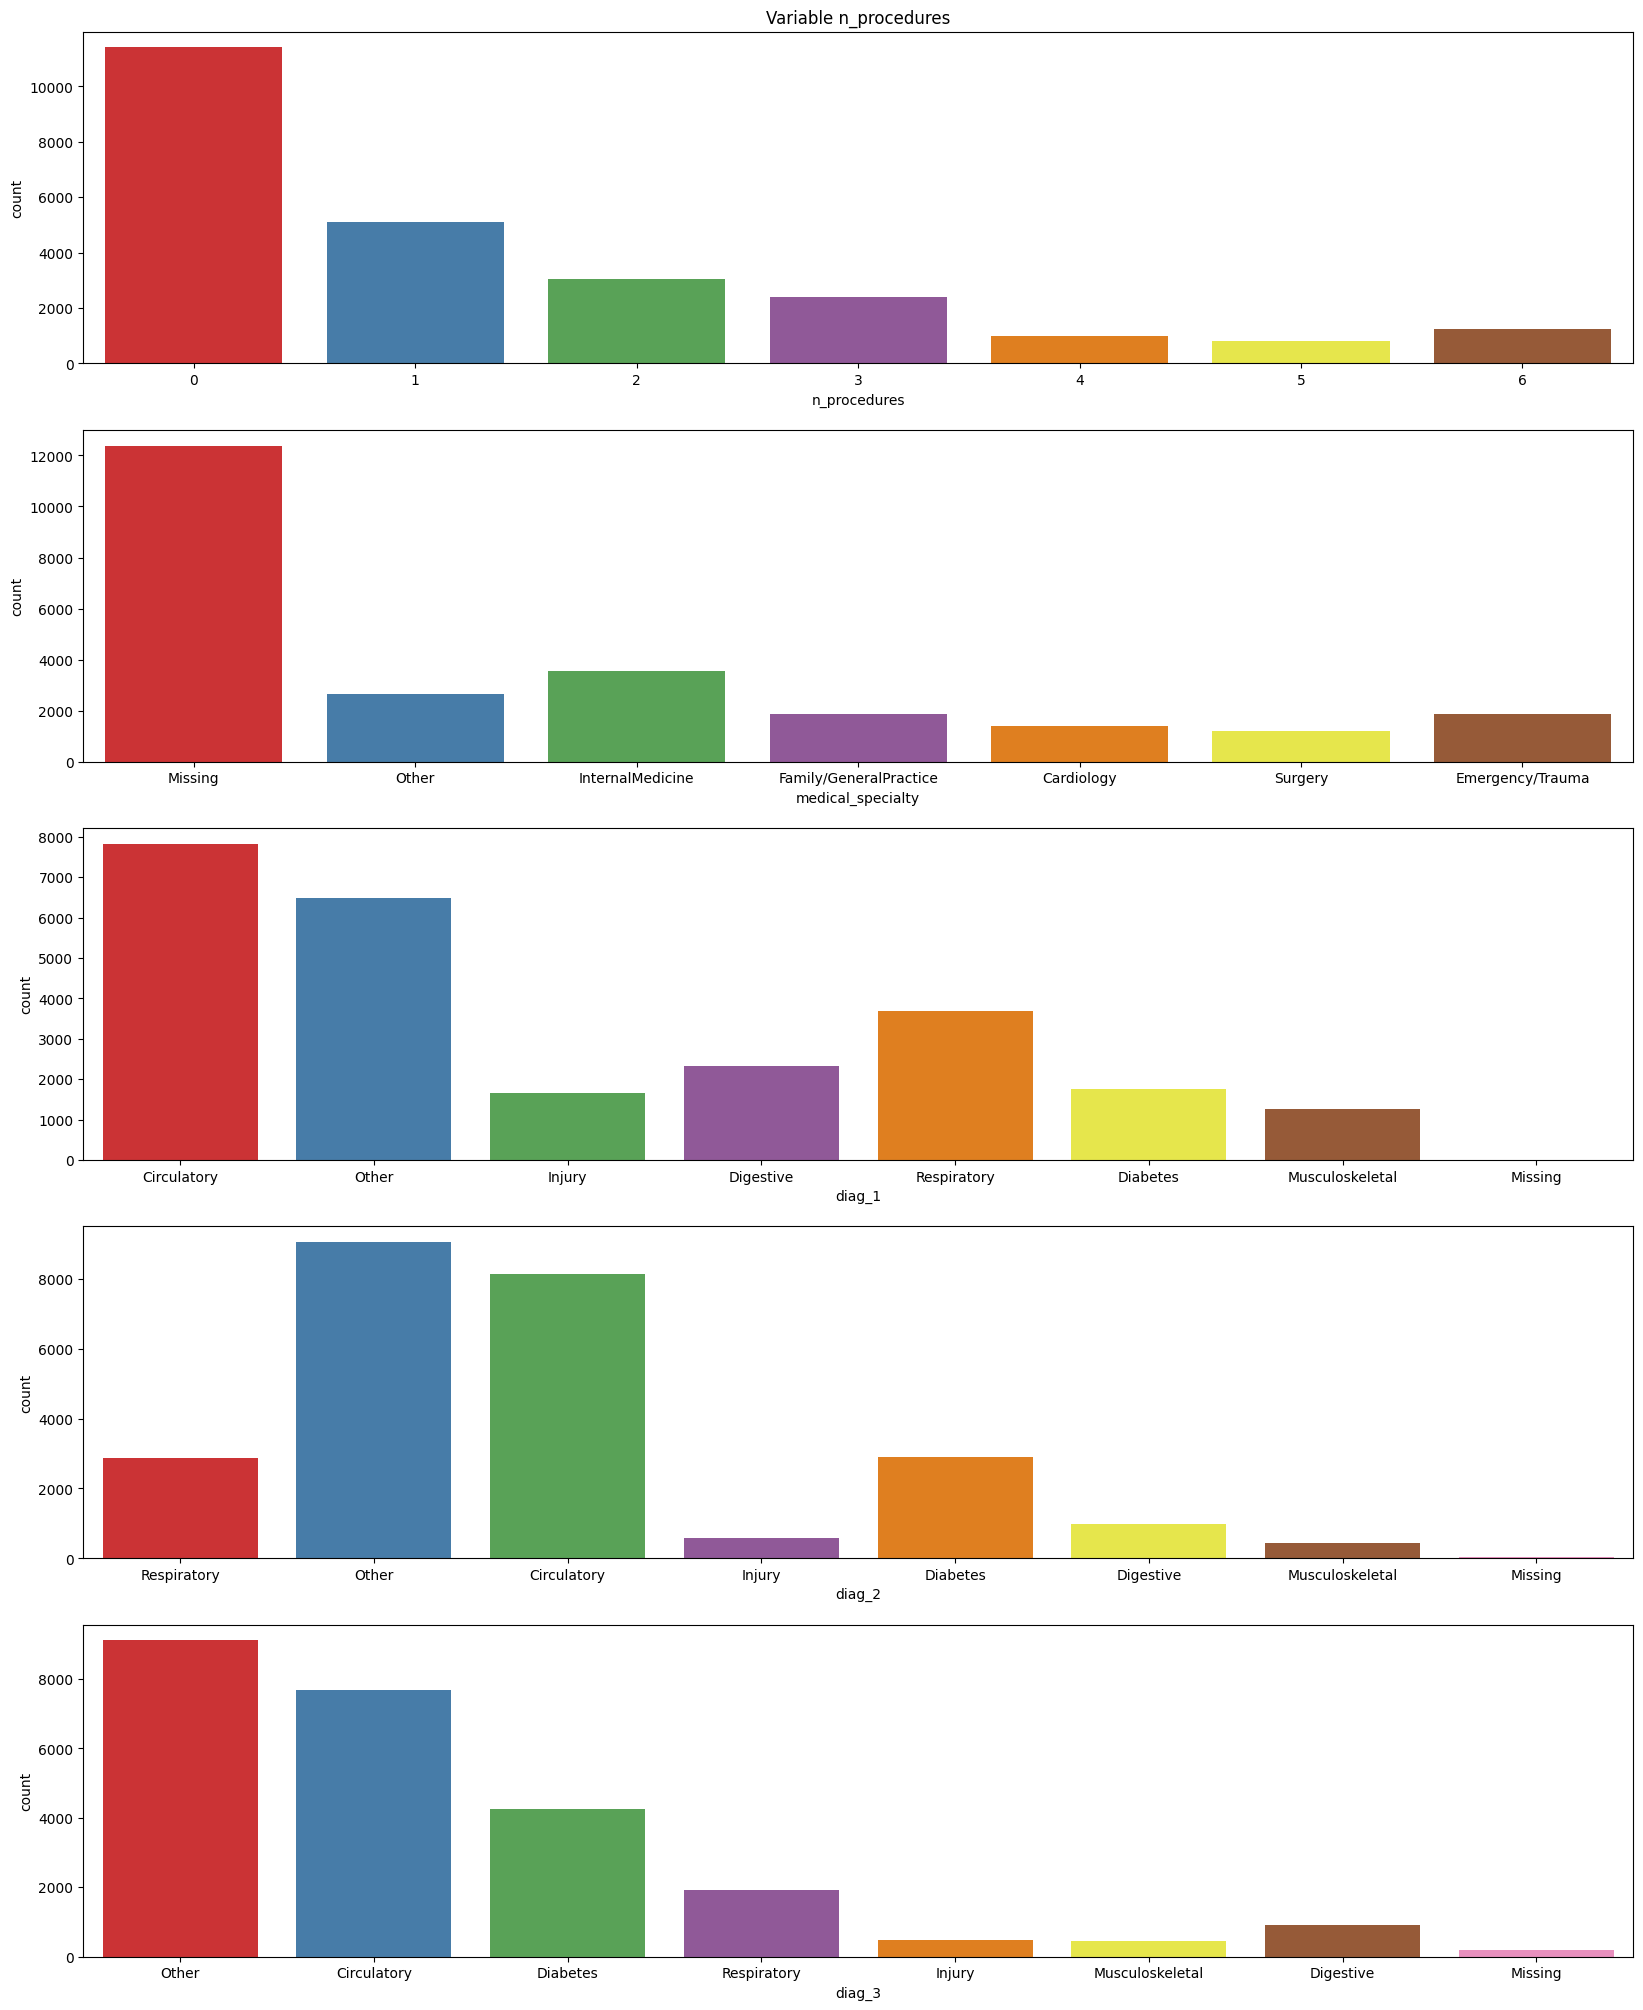

In [16]:
# EDA on Categorical Variables

plt.figure(figsize = (20, 25))

plt.subplot(5, 1, 1)
plt.gca().set_title('Variable n_procedures')
sns.countplot(x = 'n_procedures', palette = 'Set1', data = df)

plt.subplot(5, 1, 2)
sns.countplot(x = 'medical_specialty', palette = 'Set1', data = df)

plt.subplot(5, 1, 3)
sns.countplot(x = 'diag_1', palette = 'Set1', data = df)

plt.subplot(5, 1, 4)
sns.countplot(x = 'diag_2', palette = 'Set1', data = df)

plt.subplot(5, 1, 5)
sns.countplot(x = 'diag_3', palette = 'Set1', data = df)

looking at our categorical variables we can see that we have some predominant values ​​in our database, looking at the variable n_procedures we can see that the higher the number, the smaller the amount of data, when we check the variable medical_speciality we can see that we have a lot of missing data, when we look at the diagnosis variable we can see that we have different diagnoses in the 3 values

In [17]:
categorical_cols

['age',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'glucose_test',
 'A1Ctest',
 'change',
 'diabetes_med']

<ipython-input-18-671f63ae1975>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='readmitted', palette='Set1', data=df)


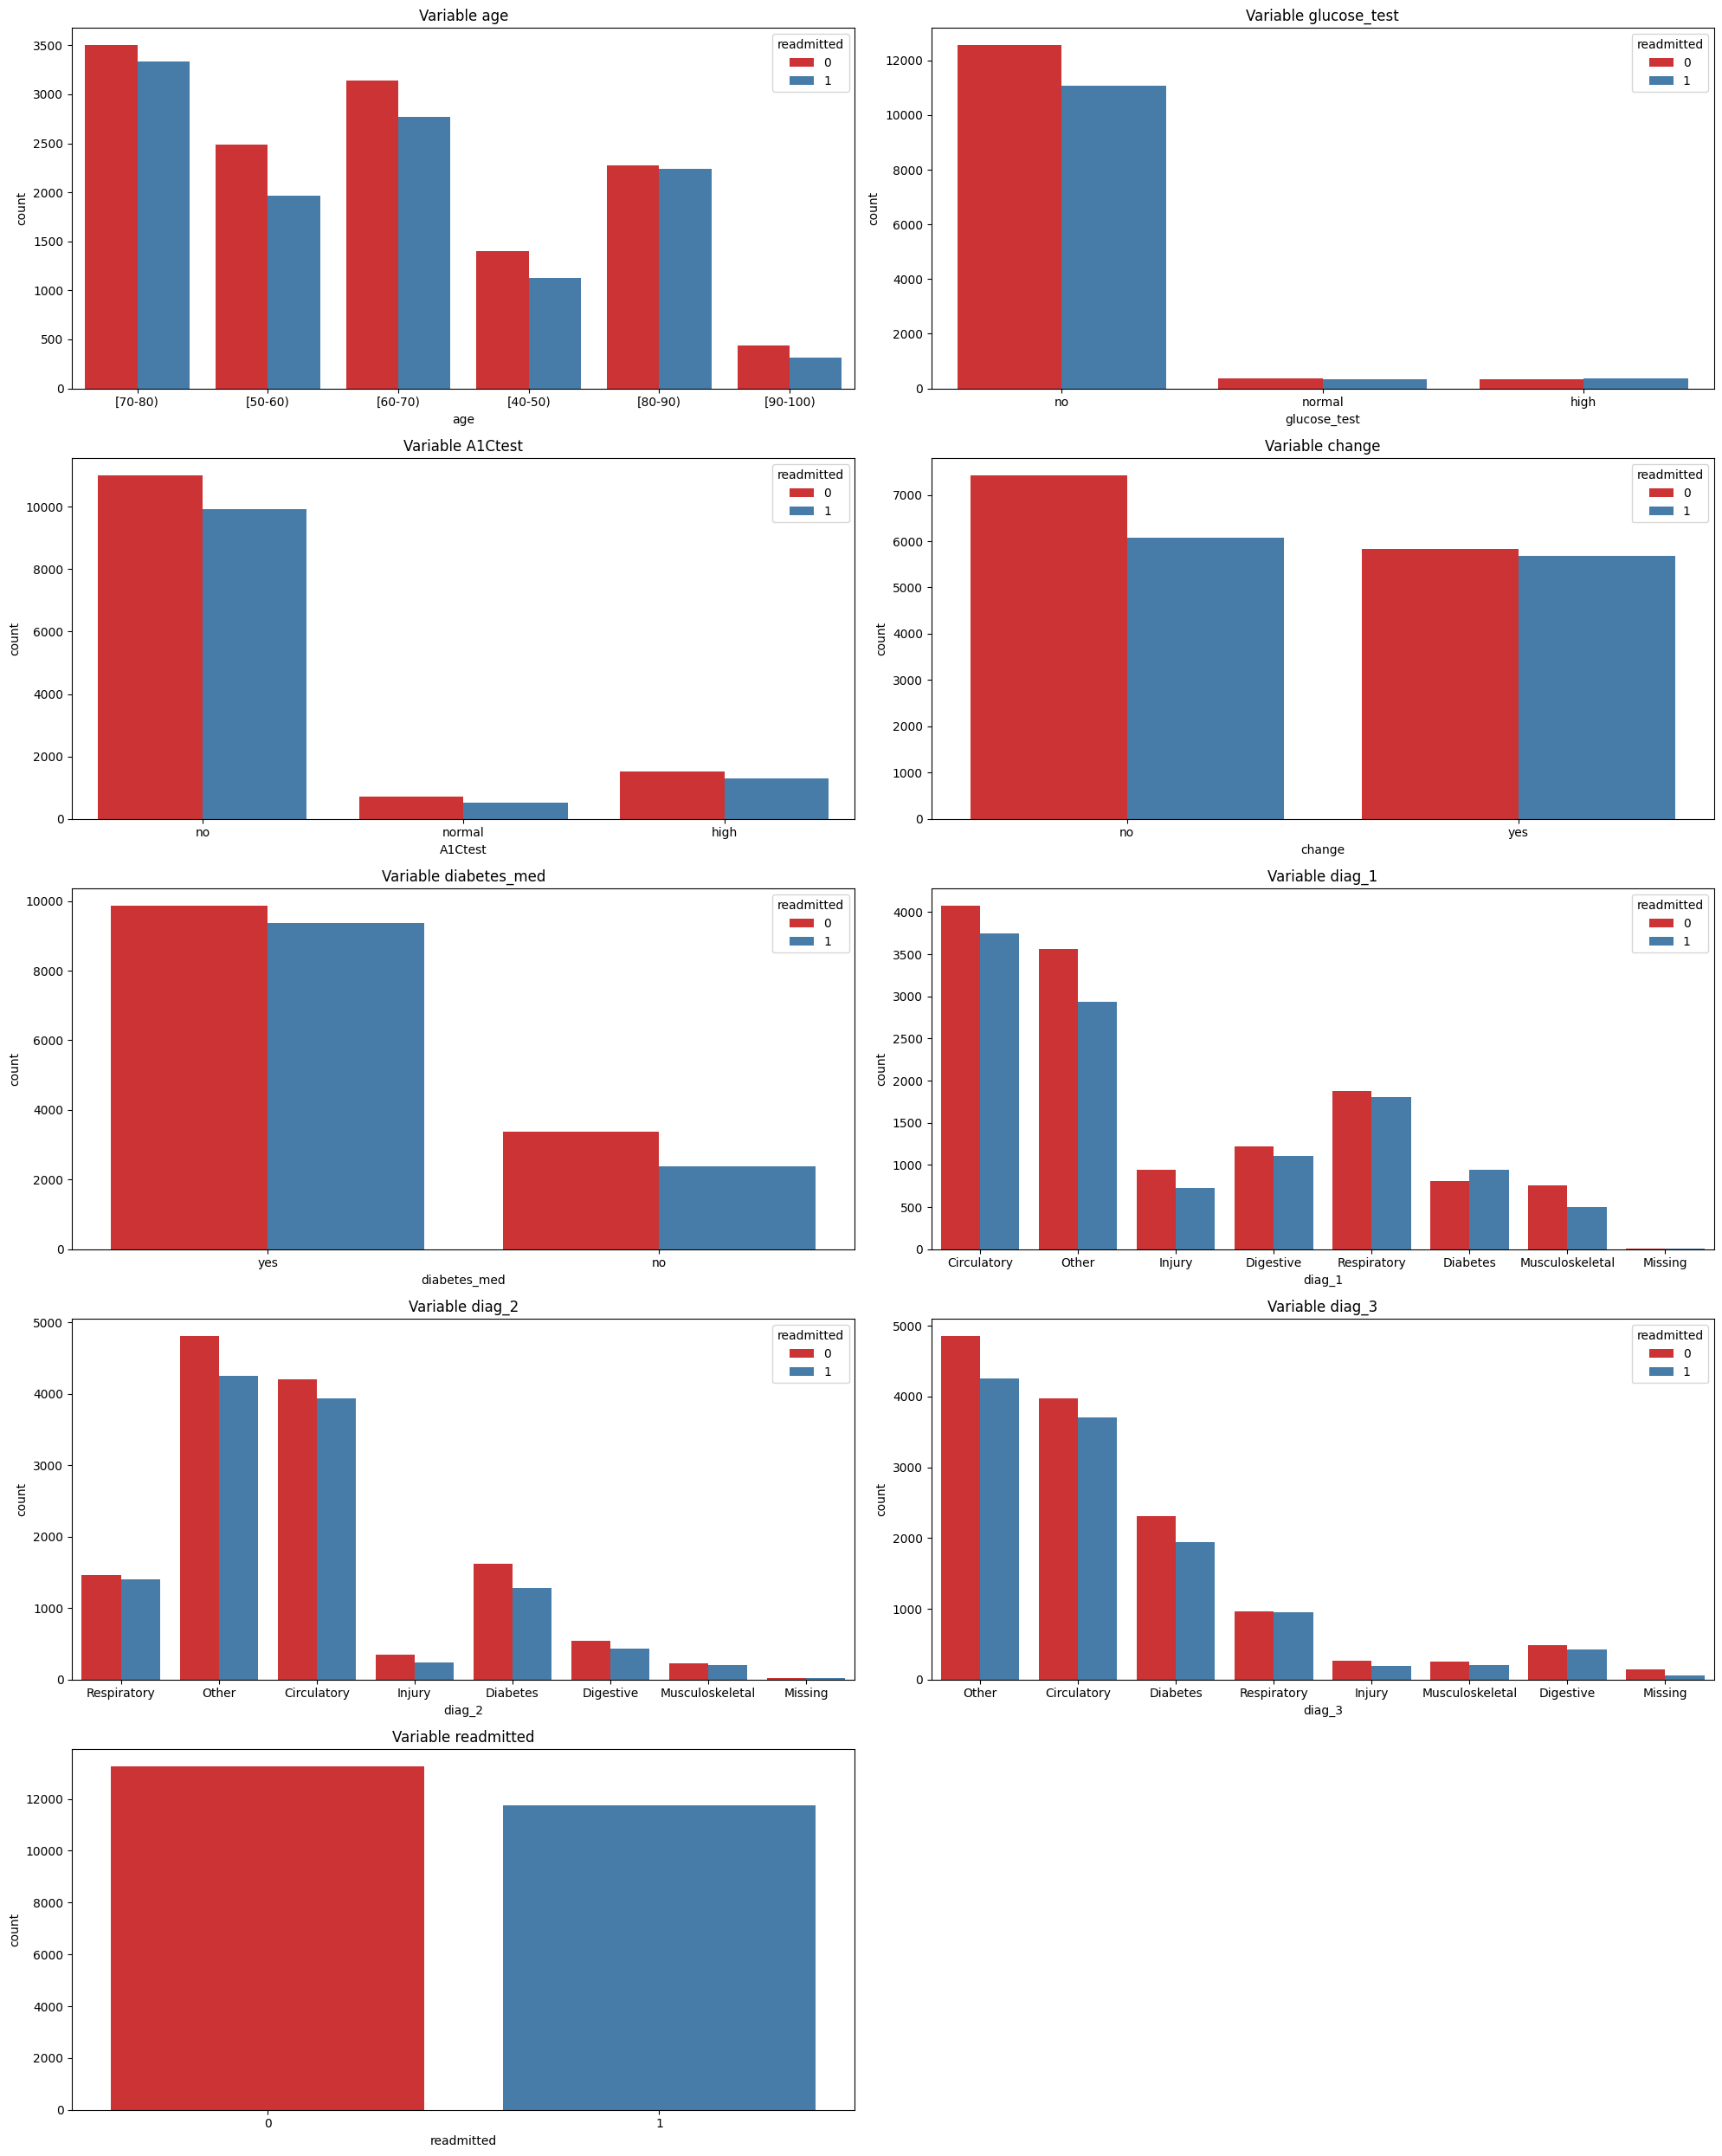

In [18]:
#Count plots for numerical features
plt.figure(figsize=(20, 25))

# Plot 1
plt.subplot(5, 2, 1)
plt.gca().set_title('Variable age')
sns.countplot(x='age', palette='Set1', data=df, hue='readmitted')

# Plot 2
plt.subplot(5, 2, 2)
plt.gca().set_title('Variable glucose_test')
sns.countplot(x='glucose_test', palette='Set1', data=df, hue='readmitted')

# Plot 3
plt.subplot(5, 2, 3)
plt.gca().set_title('Variable A1Ctest')
sns.countplot(x='A1Ctest', palette='Set1', data=df, hue='readmitted')

# Plot 4
plt.subplot(5, 2, 4)
plt.gca().set_title('Variable change')
sns.countplot(x='change', palette='Set1', data=df, hue='readmitted')

# Plot 5
plt.subplot(5, 2, 5)
plt.gca().set_title('Variable diabetes_med')
sns.countplot(x='diabetes_med', palette='Set1', data=df, hue='readmitted')

# Plot 6
plt.subplot(5, 2, 6)
plt.gca().set_title('Variable diag_1')
sns.countplot(x='diag_1', palette='Set1', data=df, hue='readmitted')

# Plot 7
plt.subplot(5, 2, 7)
plt.gca().set_title('Variable diag_2')
sns.countplot(x='diag_2', palette='Set1', data=df, hue='readmitted')

# Plot 8
plt.subplot(5, 2, 8)
plt.gca().set_title('Variable diag_3')
sns.countplot(x='diag_3', palette='Set1', data=df, hue='readmitted')

# Plot 9
plt.subplot(5, 2, 9)
plt.gca().set_title('Variable readmitted')
sns.countplot(x='readmitted', palette='Set1', data=df)

plt.tight_layout()
plt.show()


Here, looking at the age variable, we can see that most of our patients are older, looking at the glucose, we can see that most of the data do not have a glucose test, the same thing for the A1C test variable, looking at the our target variable we can see that the base is well distributed between the two data.

<ipython-input-19-12c7a22a08ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['time_in_hospital']).set(xlabel='time_in_hospital')
<ipython-input-19-12c7a22a08ba>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['n_lab_procedures']).set(xlabel='n_lab_procedures')
<ipython-input-19-1

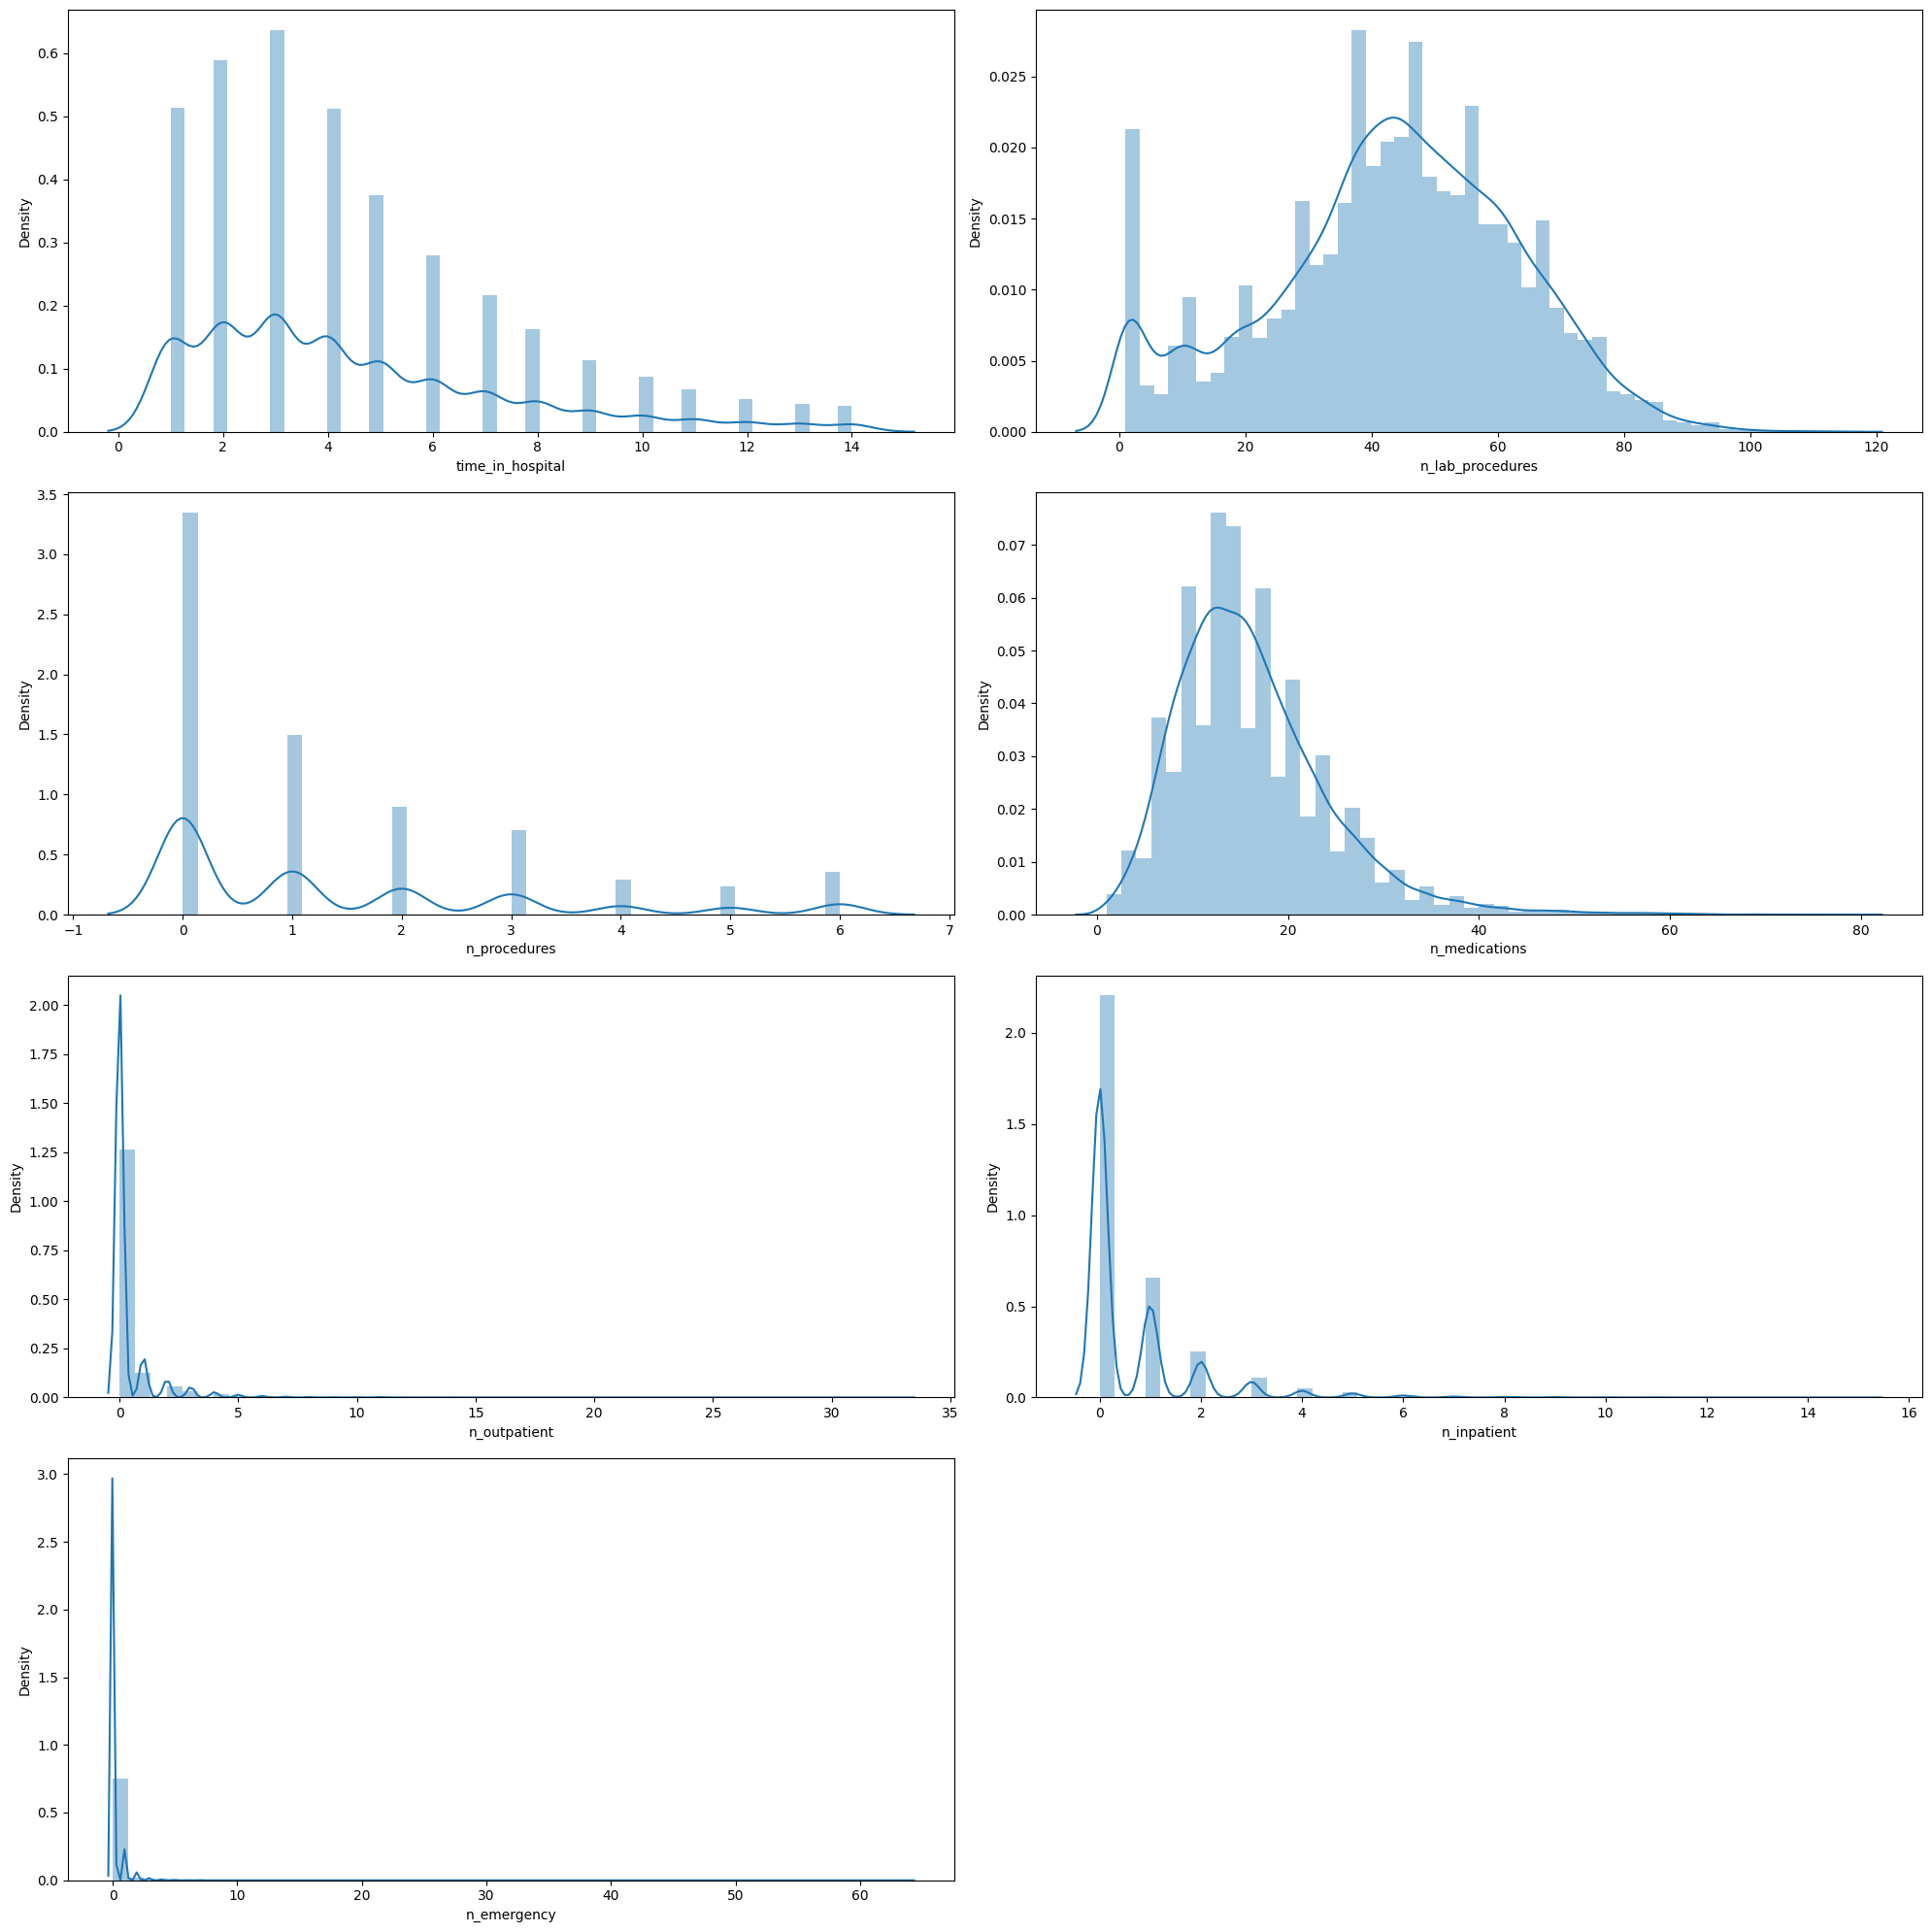

In [19]:
#Checking Distribution of the data
plt.figure(figsize=(20, 20))

plt.subplot(4, 2, 1)
sns.distplot(x=df['time_in_hospital']).set(xlabel='time_in_hospital')

plt.subplot(4, 2, 2)
sns.distplot(x=df['n_lab_procedures']).set(xlabel='n_lab_procedures')

plt.subplot(4, 2, 3)
sns.distplot(x=df['n_procedures']).set(xlabel='n_procedures')

plt.subplot(4, 2, 4)
sns.distplot(x=df['n_medications']).set(xlabel='n_medications')

plt.subplot(4, 2, 5)
sns.distplot(x=df['n_outpatient']).set(xlabel='n_outpatient')

plt.subplot(4, 2, 6)
sns.distplot(x=df['n_inpatient']).set(xlabel='n_inpatient')

plt.subplot(4, 2, 7)
sns.distplot(x=df['n_emergency']).set(xlabel='n_emergency')

plt.tight_layout()
plt.show()


Continuous Variables
Looking at our continuous variables we can see that the larger the value, the smaller the amount of data available.

Also the data is left skewed for most of the feature

In [20]:
numerical_cols

['time_in_hospital',
 'n_lab_procedures',
 'n_procedures',
 'n_medications',
 'n_outpatient',
 'n_inpatient',
 'n_emergency',
 'readmitted']

Looking at the boxplots we can see that we have some outliers.

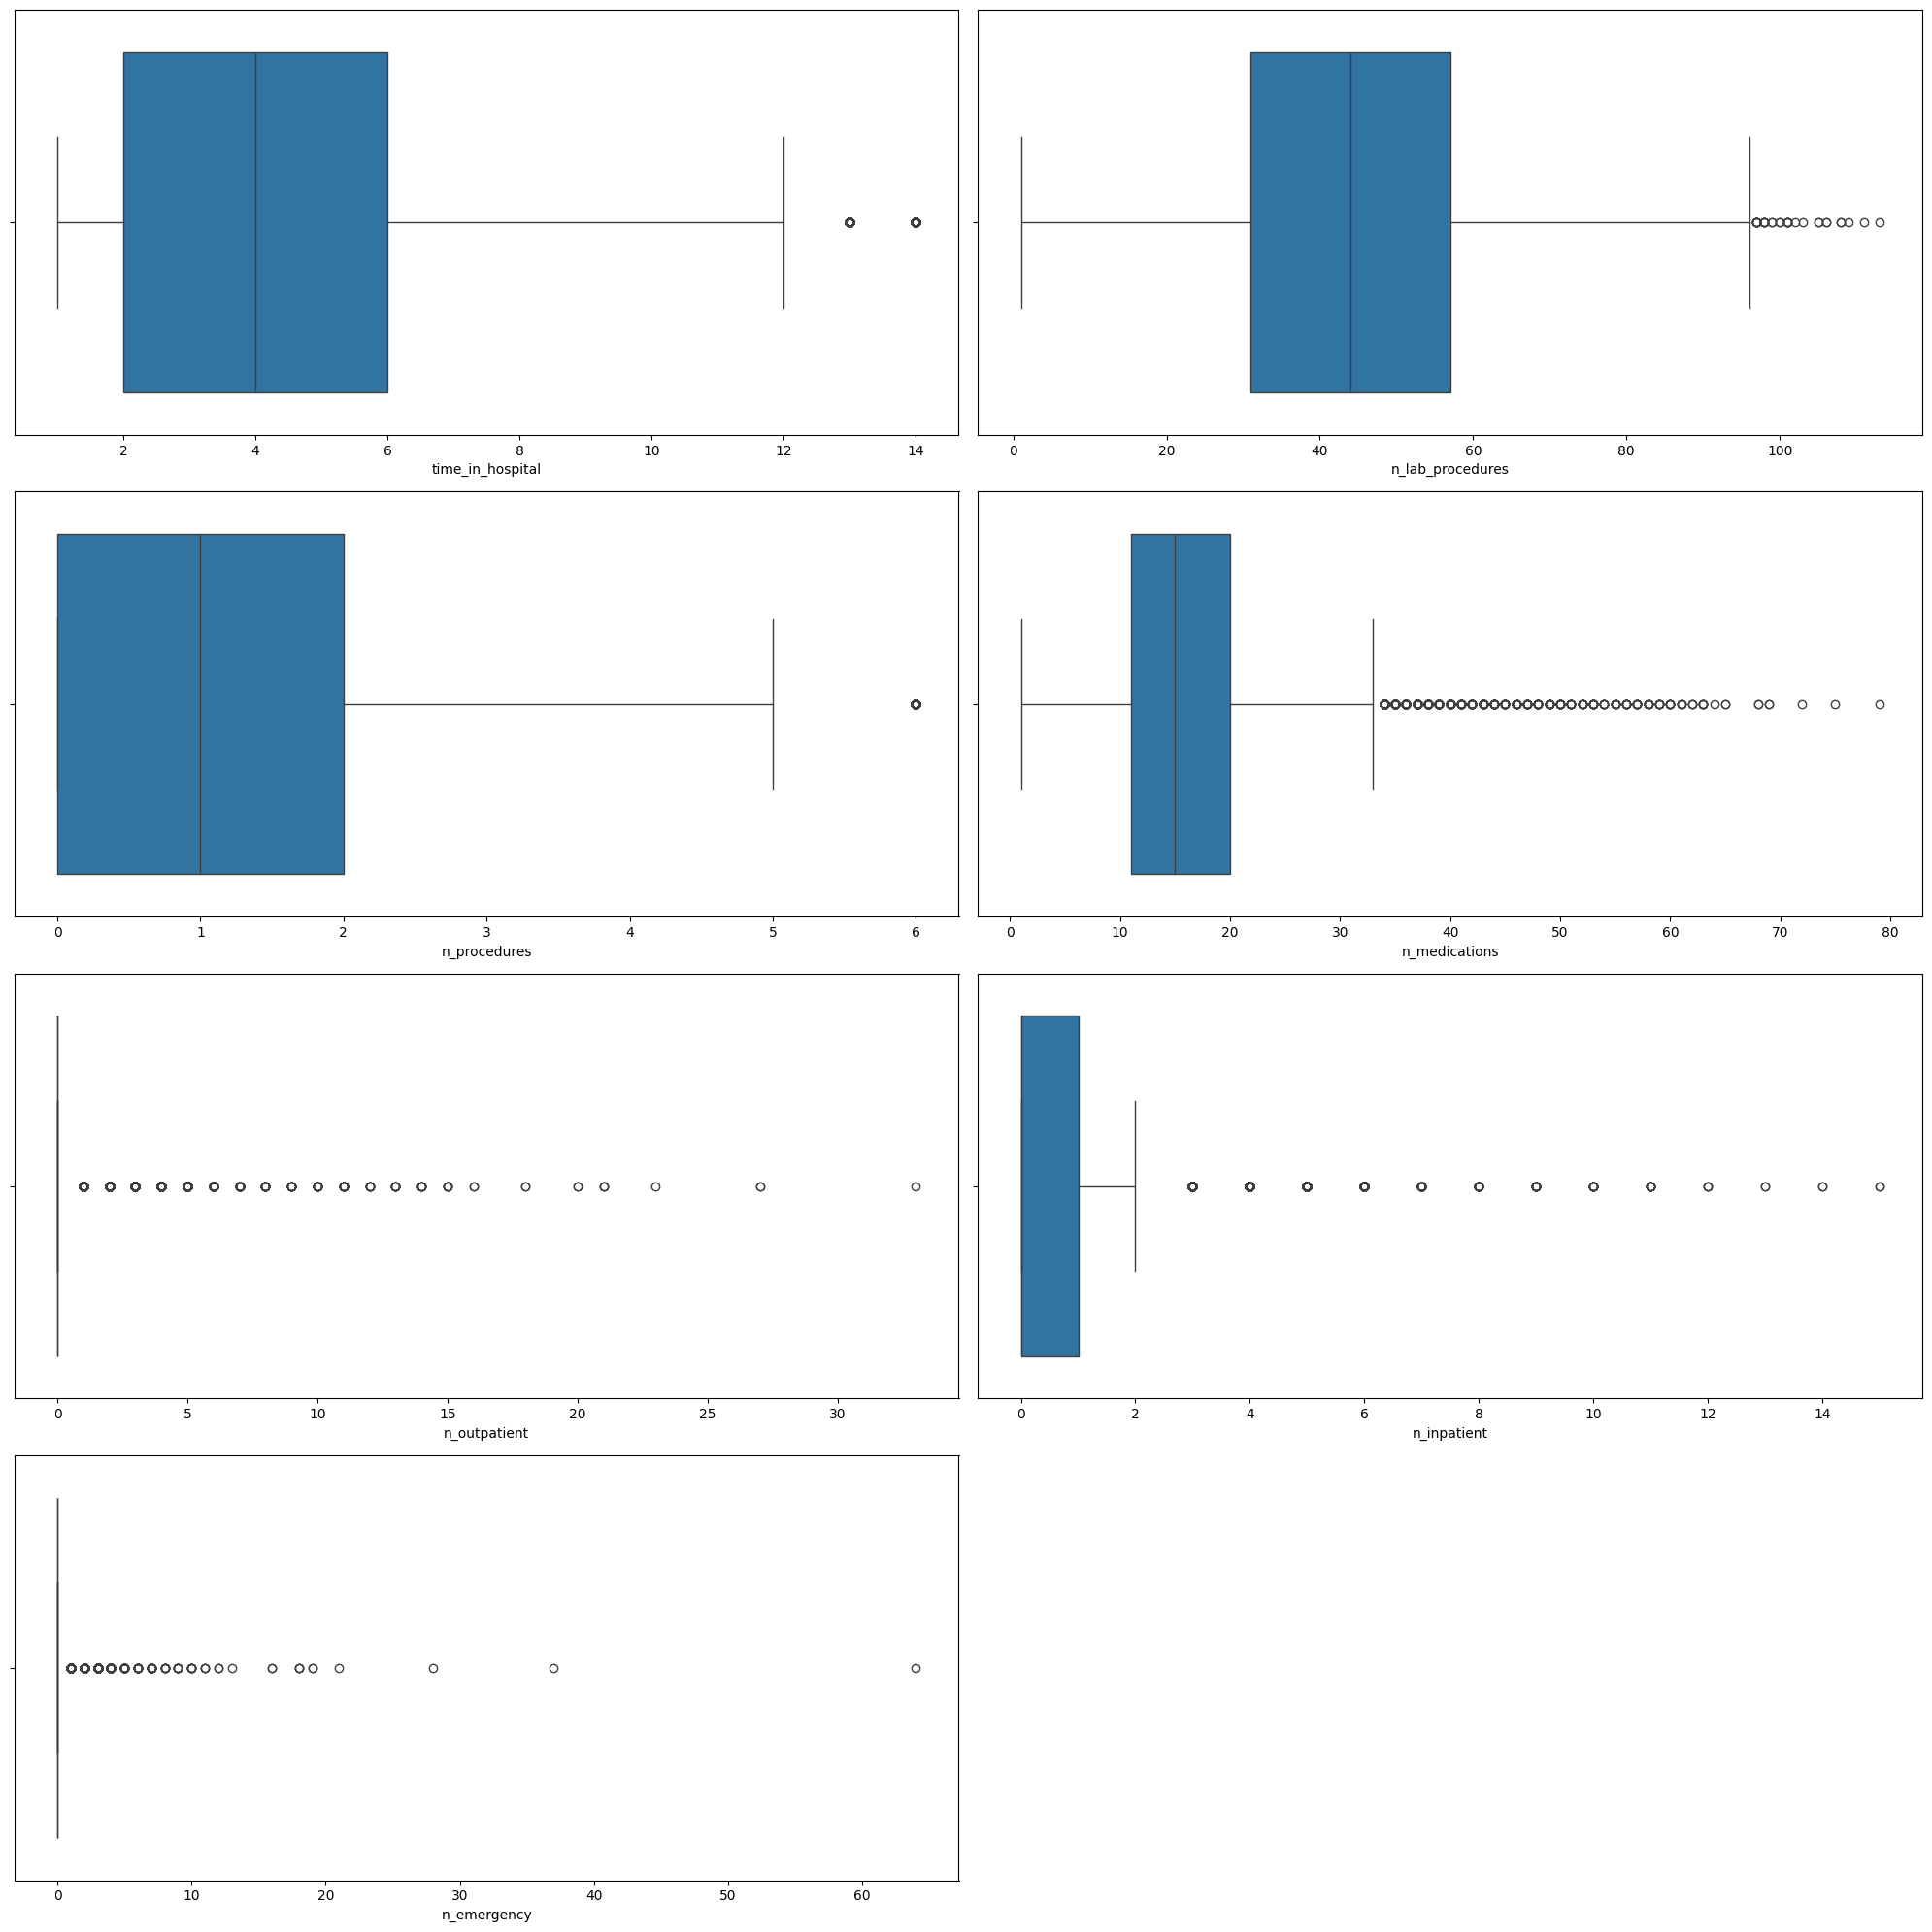

In [21]:
# Box plots for checking outliers
plt.figure(figsize=(20, 20))

plt.subplot(4, 2, 1)
sns.boxplot(x=df['time_in_hospital']).set(xlabel='time_in_hospital')

plt.subplot(4, 2, 2)
sns.boxplot(x=df['n_lab_procedures']).set(xlabel='n_lab_procedures')

plt.subplot(4, 2, 3)
sns.boxplot(x=df['n_procedures']).set(xlabel='n_procedures')

plt.subplot(4, 2, 4)
sns.boxplot(x=df['n_medications']).set(xlabel='n_medications')

plt.subplot(4, 2, 5)
sns.boxplot(x=df['n_outpatient']).set(xlabel='n_outpatient')

plt.subplot(4, 2, 6)
sns.boxplot(x=df['n_inpatient']).set(xlabel='n_inpatient')

plt.subplot(4, 2, 7)
sns.boxplot(x=df['n_emergency']).set(xlabel='n_emergency')

plt.tight_layout()
plt.show()


In [22]:
categorical_cols

['age',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'glucose_test',
 'A1Ctest',
 'change',
 'diabetes_med']

##Encoding categorical columns

In [23]:
label_encoder_age = LabelEncoder()
label_encoder_medical_specialty = LabelEncoder()
label_encoder_diag_1 = LabelEncoder()
label_encoder_diag_2 = LabelEncoder()
label_encoder_diag_3 = LabelEncoder()
label_encoder_glucose_test = LabelEncoder()
label_encoder_A1Ctest = LabelEncoder()
label_encoder_diabetes_med = LabelEncoder()
label_encoder_readmitted = LabelEncoder()
label_encoder_change = LabelEncoder()

df['age'] = label_encoder_age.fit_transform(df['age'])
df['medical_specialty'] = label_encoder_medical_specialty.fit_transform(df['medical_specialty'])
df['diag_1'] = label_encoder_diag_1.fit_transform(df['diag_1'])
df['diag_2'] = label_encoder_diag_2.fit_transform(df['diag_2'])
df['diag_3'] = label_encoder_diag_3.fit_transform(df['diag_3'])
df['glucose_test'] = label_encoder_glucose_test.fit_transform(df['glucose_test'])
df['A1Ctest'] = label_encoder_A1Ctest.fit_transform(df['A1Ctest'])
df['diabetes_med'] = label_encoder_diabetes_med.fit_transform(df['diabetes_med'])
df['readmitted'] = label_encoder_readmitted.fit_transform(df['readmitted'])
df['change'] = label_encoder_change.fit_transform(df['change'])

In [24]:
df.dtypes

,0
age,int64
time_in_hospital,int64
n_lab_procedures,int64
n_procedures,int64
n_medications,int64
n_outpatient,int64
n_inpatient,int64
n_emergency,int64
medical_specialty,int64
diag_1,int64


In [25]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,3,8,72,1,18,2,0,0,4,0,7,6,1,1,0,1,0
1,3,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,0
2,1,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,1
3,3,2,36,0,12,1,0,0,4,0,6,1,1,1,1,1,1
4,2,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,0


##New Feature Generation

In [26]:
# total number of times the patient has visited hospital
df['total_visits'] = df['n_outpatient'] + df['n_inpatient'] + df['n_emergency']

# Chronic Condition Index based on the number of procedures and medications
df['chronic_condition_index'] = df['n_procedures'] + df['n_medications']


In [27]:
# Interaction Features
df['medication_procedure_interaction'] = df['n_medications'] * df['n_procedures']

# Ratio between emergency visit counts and admited counts
df['emergency_inpatient_ratio'] = df['n_emergency'] / (df['n_inpatient'] + 1)

# Aggregate Diagnostic Features
diagnostic_cols = ['diag_1', 'diag_2', 'diag_3']
df['unique_diagnoses_count'] = df[diagnostic_cols].nunique(axis=1)





In [28]:
df.dtypes

,0
age,int64
time_in_hospital,int64
n_lab_procedures,int64
n_procedures,int64
n_medications,int64
n_outpatient,int64
n_inpatient,int64
n_emergency,int64
medical_specialty,int64
diag_1,int64


##Separating into features variables and target variable.

In [29]:
X = df.drop('readmitted', axis = 1)
X = X.values
y = df['readmitted']

In [30]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted', 'total_visits',
       'chronic_condition_index', 'medication_procedure_interaction',
       'emergency_inpatient_ratio', 'unique_diagnoses_count'],
      dtype='object')

In [43]:
# Final numerical features
fin_num_cols = ['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'total_visits',
       'chronic_condition_index', 'medication_procedure_interaction',
       'emergency_inpatient_ratio', 'unique_diagnoses_count']

##StandardScaler Here we will use StandardScaler to put our data in the same scale.

In [44]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

##Splitting Data Into train and test datasets

In [45]:
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 42)

##Experimenting on multiple models

In [46]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # Enable probability estimates
    'KNN': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}

# Function to test models with custom threshold and save models
def test_models(models, X_train, X_test, y_train, y_test, threshold=0.5):
    results = []
    saved_models = {}  # Dictionary to store models

    for name, model in models.items():
        print(f"\nTraining {name}...")
        # Train the model
        model.fit(X_train, y_train)

        # Get probabilities
        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):  # For SVMs
            probs = model.decision_function(X_test)
            probs = (probs - probs.min()) / (probs.max() - probs.min())  # Normalize to [0, 1]
        else:
            print(f"{name} does not support probabilities. Skipping.")
            continue

        # Apply threshold
        y_preds = (probs >= threshold).astype(int)

        # Confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()

        # Evaluate metrics
        f1 = f1_score(y_test, y_preds)
        auc = roc_auc_score(y_test, probs)
        print(f"F1 Score: {f1:.2f}")
        print(f"ROC AUC Score: {auc:.2f}")
        print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
        print("Classification Report:\n", classification_report(y_test, y_preds))

        # Save model
        saved_models[name] = model

        # Store results
        results.append({
            'Model': name,
            'F1 Score': f1,
            'ROC AUC': auc,
            'True Positives (TP)': tp,
            'True Negatives (TN)': tn,
            'False Positives (FP)': fp,
            'False Negatives (FN)': fn
        })

    return results, saved_models

# Example usage
results, saved_models = test_models(models, X_train, X_test, y_train, y_test, threshold=0.5)

# Display summary of results
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df.sort_values(by='F1 Score', ascending=False))

# Get the best model
best_model_name = results_df.sort_values(by='ROC AUC', ascending=False).iloc[0]['Model']
best_model = saved_models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Extract feature importance if the best model supports it
if hasattr(best_model, 'feature_importances_'):
    feature_importance = best_model.feature_importances_
    print(f"\nFeature Importance for {best_model_name}:\n", feature_importance)
elif hasattr(best_model, 'coef_'):
    feature_importance = best_model.coef_
    print(f"\nFeature Coefficients for {best_model_name}:\n", feature_importance)
else:
    print(f"{best_model_name} does not support feature importance.")



Training Logistic Regression...
F1 Score: 0.50
ROC AUC Score: 0.64
Confusion Matrix: TN=3128, FP=872, FN=2058, TP=1442
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.78      0.68      4000
           1       0.62      0.41      0.50      3500

    accuracy                           0.61      7500
   macro avg       0.61      0.60      0.59      7500
weighted avg       0.61      0.61      0.59      7500


Training Decision Tree...
F1 Score: 0.51
ROC AUC Score: 0.54
Confusion Matrix: TN=2218, FP=1782, FN=1673, TP=1827
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.55      0.56      4000
           1       0.51      0.52      0.51      3500

    accuracy                           0.54      7500
   macro avg       0.54      0.54      0.54      7500
weighted avg       0.54      0.54      0.54      7500


Training Random Forest...
F1 Score: 0.56
ROC AUC Score: 0.63
C

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:49:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score: 0.54
ROC AUC Score: 0.63
Confusion Matrix: TN=2616, FP=1384, FN=1673, TP=1827
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.65      0.63      4000
           1       0.57      0.52      0.54      3500

    accuracy                           0.59      7500
   macro avg       0.59      0.59      0.59      7500
weighted avg       0.59      0.59      0.59      7500


Training LightGBM...
[LightGBM] [Info] Number of positive: 8254, number of negative: 9246
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471657 -> initscore=-0.113493
[LightGBM] [Info] Start training from 

In [69]:
results_df.sort_values(by='ROC AUC', ascending=False)

,Model,F1 Score,ROC AUC,True Positives (TP),True Negatives (TN),False Positives (FP),False Negatives (FN)
7,LightGBM,0.552603,0.650393,1799,2788,1212,1701
0,Logistic Regression,0.496044,0.644602,1442,3128,872,2058
3,SVM,0.550063,0.644310,1758,2866,1134,1742
5,Gaussian Naive Bayes,0.355741,0.637743,852,3562,438,2648
2,Random Forest,0.557105,0.633655,1878,2636,1364,1622
6,XGBoost,0.544479,0.628857,1827,2616,1384,1673
4,KNN,0.524077,0.583938,1774,2504,1496,1726
1,Decision Tree,0.513996,0.538250,1827,2218,1782,1673


##Plotting ROC Curve for all the models

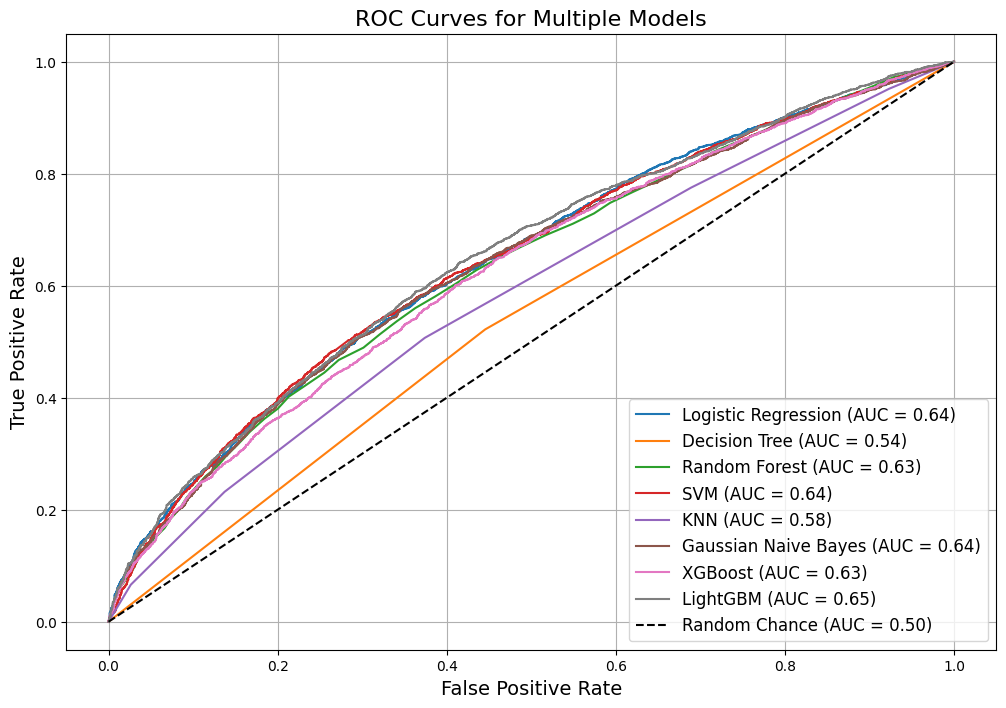

In [60]:
# Plot ROC curves for all models
def plot_roc_curves(models, X_test, y_test, saved_models):
    plt.figure(figsize=(12, 8))

    for model_name, model in saved_models.items():
        # Get probabilities
        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            probs = model.decision_function(X_test)
            probs = (probs - probs.min()) / (probs.max() - probs.min())  # Normalize to [0, 1]
        else:
            print(f"{model_name} does not support probability scores. Skipping.")
            continue

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)

        # Plot the curve
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

    # Plot random chance line
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')

    # Add labels and legend
    plt.title('ROC Curves for Multiple Models', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.show()

# Call the plotting function
plot_roc_curves(models, X_test, y_test, saved_models)


In [48]:
best_model_name = results_df.sort_values(by='ROC AUC', ascending=False).iloc[0]['Model']
best_model = saved_models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: LightGBM


In [50]:
feat_imps = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': fin_num_cols, 'Importance': feat_imps})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [51]:
importance_df

,Feature,Importance
2,n_lab_procedures,477
18,medication_procedure_interaction,296
4,n_medications,276
1,time_in_hospital,253
17,chronic_condition_index,212
0,age,210
8,medical_specialty,153
11,diag_3,152
10,diag_2,143
9,diag_1,139


##Hyper parameter tuning using gridsearchcv

In [53]:
# Define your model
model = lgb.LGBMClassifier()

# Define parameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [20, 40, 60],
    'max_depth': [-1, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Number of positive: 8254, number of negative: 9246
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471657 -> initscore=-0.113493
[LightGBM] [Info] Start training from score -0.113493
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [54]:
lgb_model = lgb.LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=40, max_depth=5)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 8254, number of negative: 9246
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 17500, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471657 -> initscore=-0.113493
[LightGBM] [Info] Start training from score -0.113493
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMClassifier(learning_rate=0.05, max_depth=5, n_estimators=40)

In [57]:
y_preds = lgb_model.predict(X_test)

In [58]:
accuracy_score(y_test,y_preds)

0.6130666666666666

In [59]:
confusion_matrix(y_test,y_preds)

array([[2910, 1090],
       [1812, 1688]])

In [61]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67      4000
           1       0.61      0.48      0.54      3500

    accuracy                           0.61      7500
   macro avg       0.61      0.60      0.60      7500
weighted avg       0.61      0.61      0.61      7500



## Thus LightGBM performed better than other algorithms